In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# np.printoptions(threshold=np.inf) # type: ignore

In [2]:
# create a signal
samp_rate = 256 # Hz
time = np.arange(0,4,1/samp_rate)
# time, time.shape

In [3]:
x = np.sin(2*np.pi*time)
noise = np.random.randn(len(time))

In [4]:
x.std()

0.7071067811865476

In [5]:
noisy_signal = x+noise

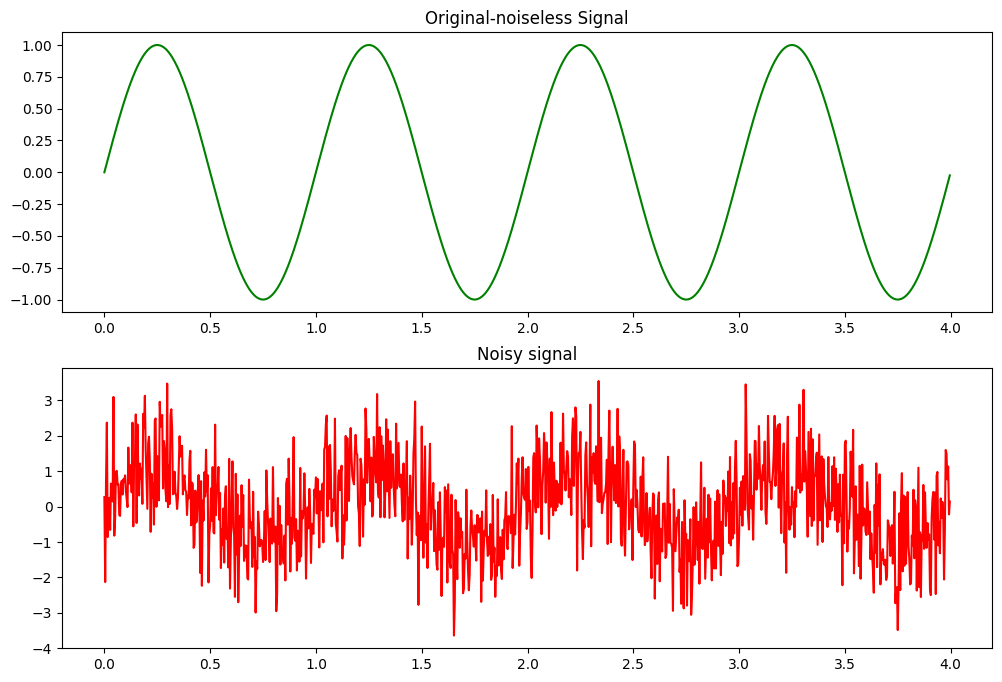

In [6]:
plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(time,x, color='g')
plt.title('Original-noiseless Signal')
plt.subplot(212)
plt.plot(time,noisy_signal, color='r')
plt.title('Noisy signal')
plt.show()

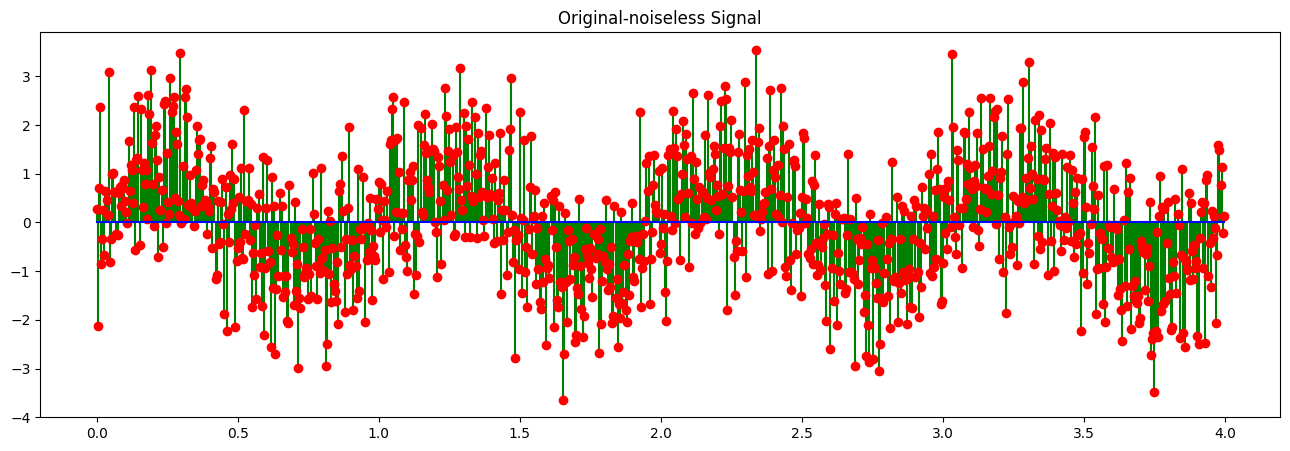

In [7]:
plt.figure(figsize=(16,5))
h, s, m = plt.stem(time,noisy_signal)
plt.setp(s, color='g')
plt.setp(h, color='r')
plt.setp(m, color='b')
plt.title('Original-noiseless Signal')
plt.show()

In [8]:
filter = np.ones(64)/10.0
filter

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
       0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

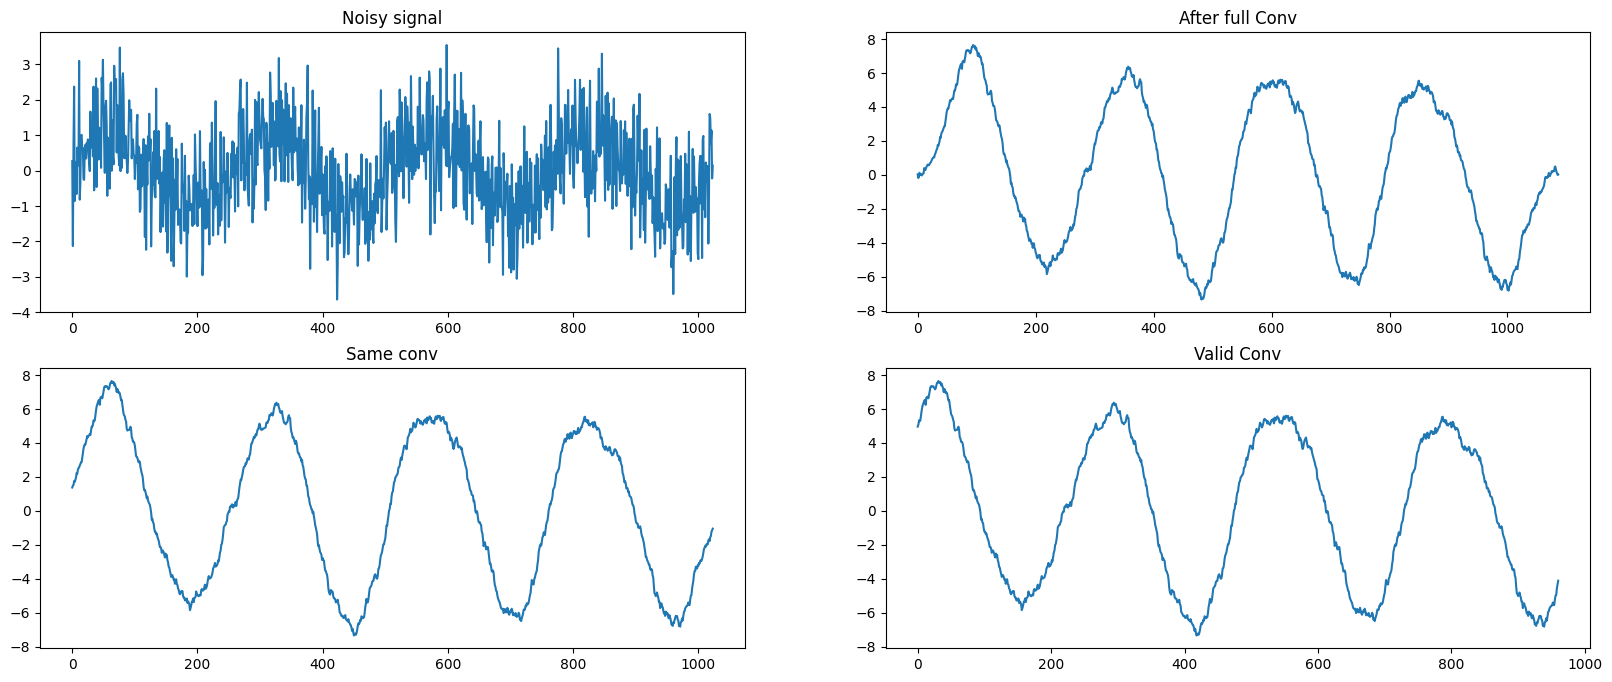

In [9]:
full_filtered_signal = np.convolve(noisy_signal, filter, mode='full')
same_filtered_signal = np.convolve(noisy_signal, filter, mode='same')
valid_filtered_signal = np.convolve(noisy_signal, filter, mode='valid')
plt.figure(figsize=(20, 8))
plt.subplot(221)
plt.title("Noisy signal")
plt.plot(noisy_signal)
plt.subplot(222)
plt.title("After full Conv")
plt.plot(full_filtered_signal)
plt.subplot(223)
plt.plot(same_filtered_signal)
plt.title("Same conv")
plt.subplot(2,2,4)
plt.plot(valid_filtered_signal)
plt.title("Valid Conv")
plt.show()

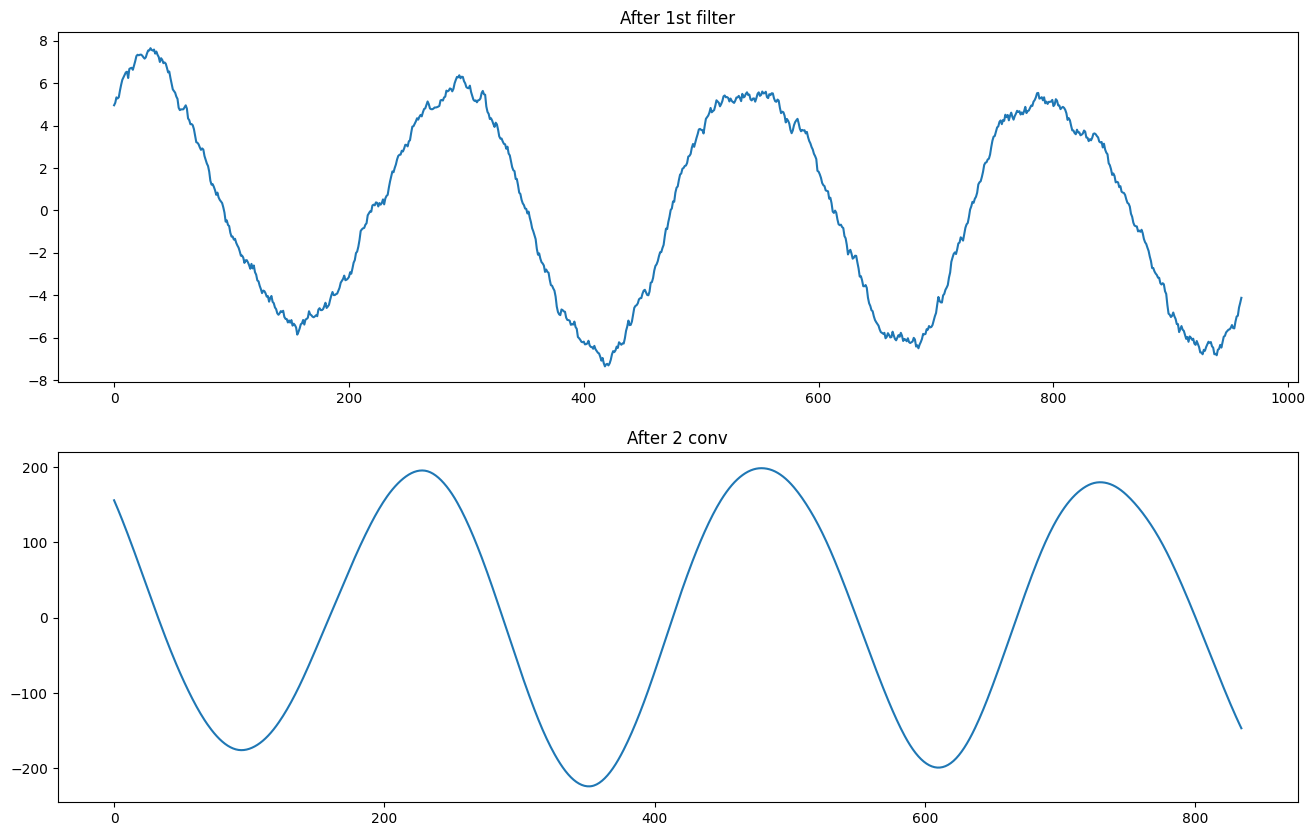

In [10]:
second_filtered = valid_filtered_signal
k = 2
for _ in range(k):
    second_filtered = np.convolve(second_filtered, filter, mode='valid')
plt.figure(figsize=(16, 10))
plt.subplot(211)
plt.plot(valid_filtered_signal)
plt.title("After 1st filter")
plt.subplot(212)
plt.plot(second_filtered)
plt.title(f"After {k} conv")
plt.show()

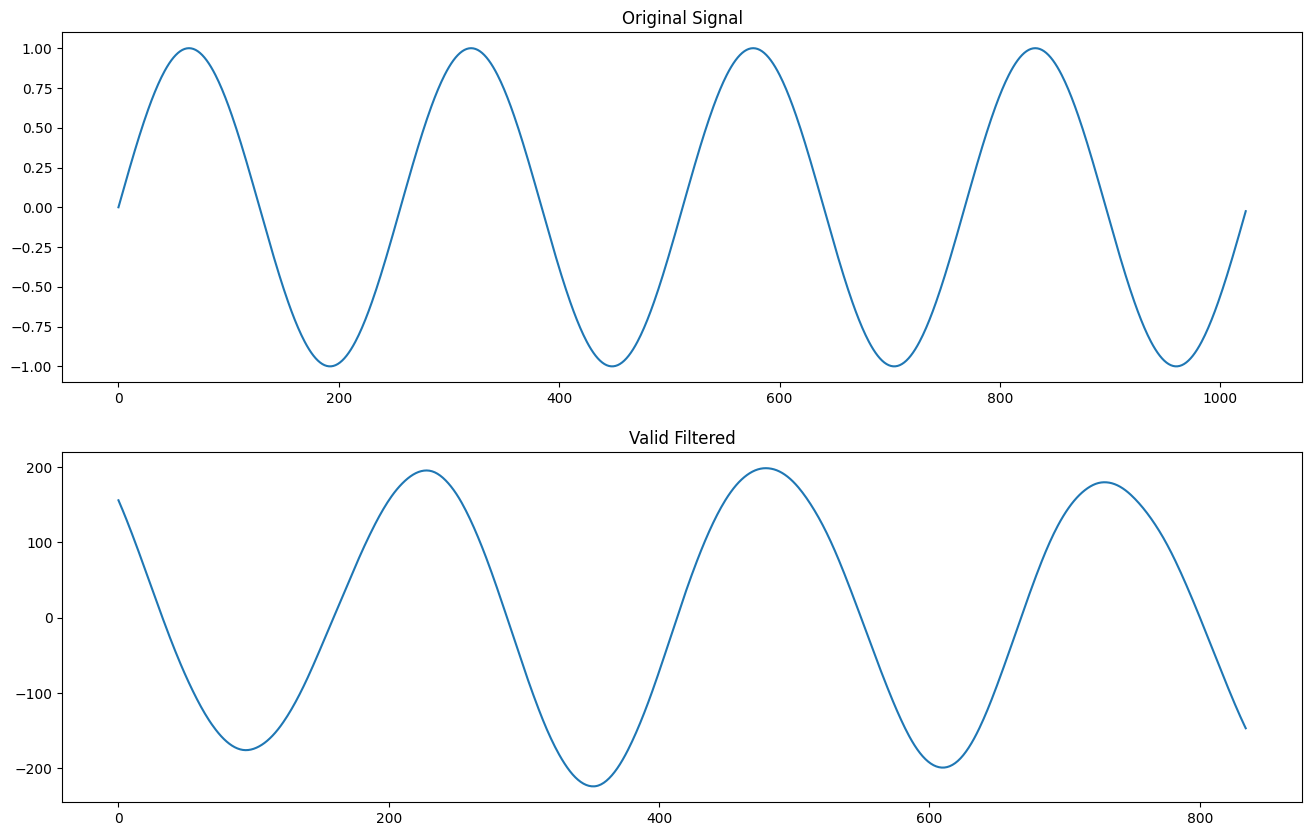

In [11]:
plt.figure(figsize=(16,10))
plt.subplot(211)
plt.plot(x)
plt.title("Original Signal")
plt.subplot(212)
plt.plot(second_filtered)
plt.title("Valid Filtered")
plt.show()

### Home Task:
Design a Gaussian filter and apply for convolution for noise reduction.

In [25]:
# gaussian_filter = np.random.randn(64)
size=16
sigma = x.std()
mu = x.mean()
idx = np.arange(-size // 2 + 1., size // 2 + 1., step=0.2)
mode = "same"

# # Calculate the Gaussian kernel
gaussian_filter = np.exp(-(idx-mu)**2 / (2 * sigma**2)) / (np.sqrt(2*np.pi) * sigma)
gauss_filt_signal = np.convolve(noisy_signal, gaussian_filter, mode=mode)

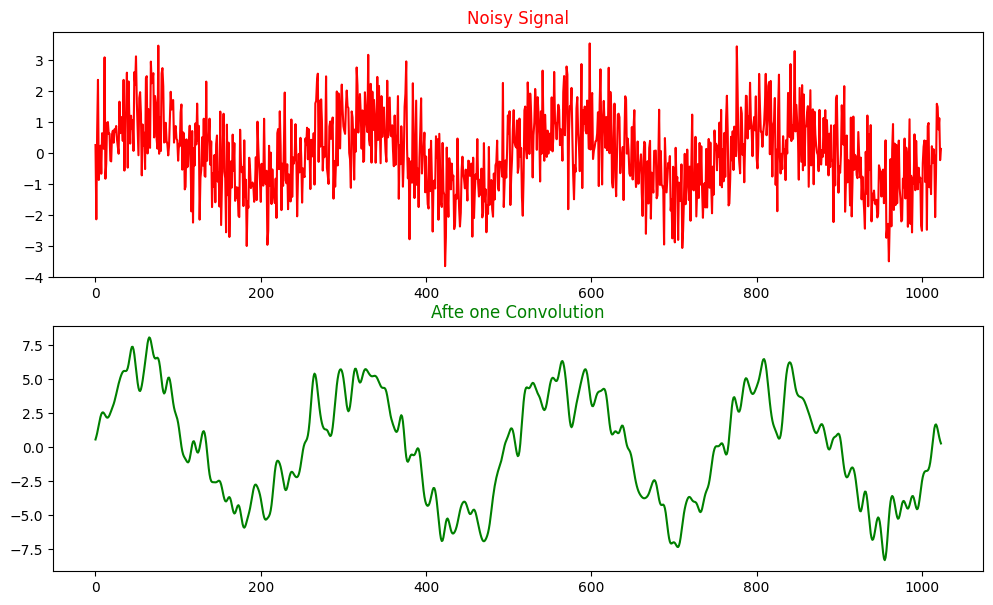

In [26]:
mode = 'same'
filtered_Signal = np.convolve(noisy_signal, gaussian_filter, mode=mode)
plt.figure(figsize=(12,7))
plt.subplot(211)
plt.title("Noisy Signal", color='r')
plt.plot(noisy_signal, color='r')
plt.subplot(212)
plt.plot(filtered_Signal, color='g')
plt.title("Afte one Convolution", color='g')
plt.show()

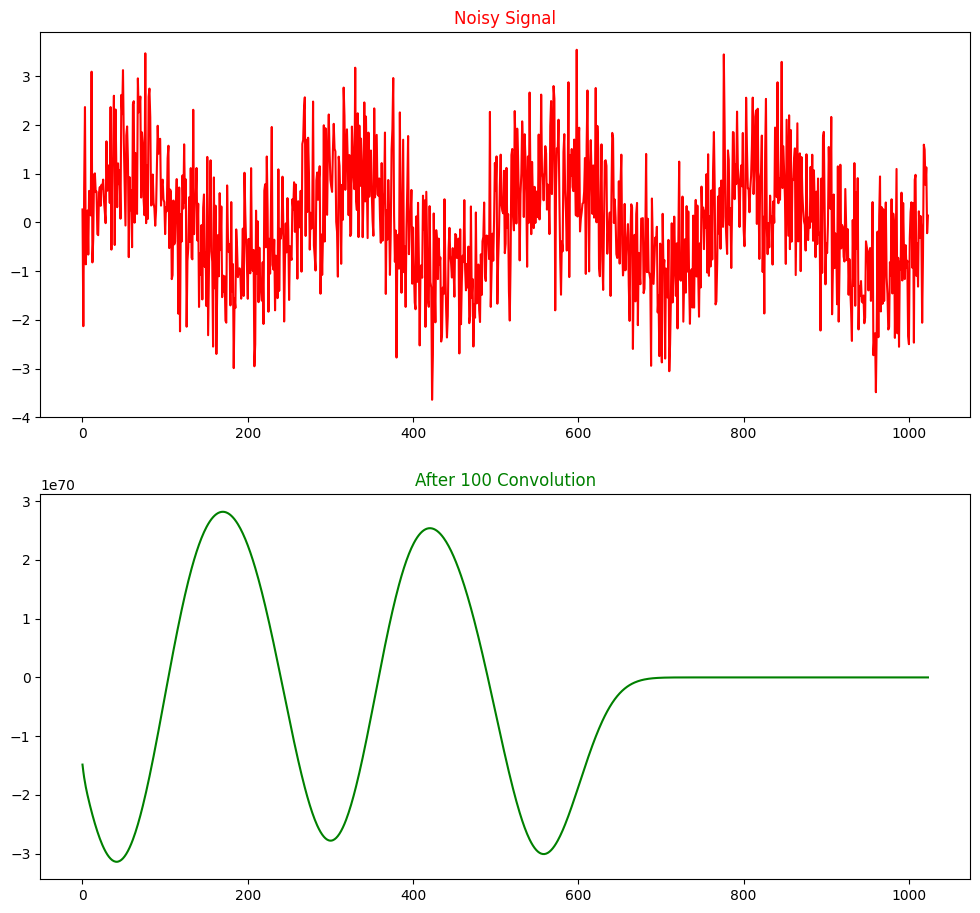

In [27]:
n = 100
for _ in range(n):
    filtered_Signal = np.convolve(filtered_Signal, gaussian_filter, mode=mode) # type: ignore
    filtered_Signal = np.trim_zeros(filtered_Signal, trim='fb')
plt.figure(figsize=(12,11))
plt.subplot(211)
plt.title("Noisy Signal", color='r')
plt.plot(noisy_signal, color='r')
plt.subplot(212)
plt.plot(filtered_Signal, color='g')
plt.title(f"After {n} Convolution", color='g')
plt.show()

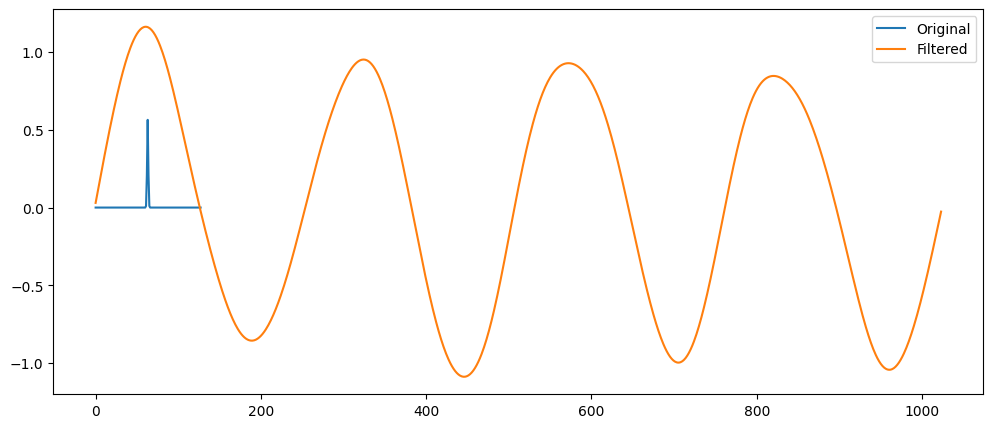

In [18]:
for _ in range(500):
    gauss_filt_signal = np.convolve(gauss_filt_signal, gaussian_filter, mode=mode) # type: ignore
plt.figure(figsize=(12,5))
# plt.plot(x, label='Original')
# plt.plot(noisy_signal, label='Noisy')
# gauss_filt_signal = np.trim_zeros(gauss_filt_signal, 'fb')
plt.plot(gauss_filt_signal, label='Filtered')
plt.legend()
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_26300\2825479854.py:1: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


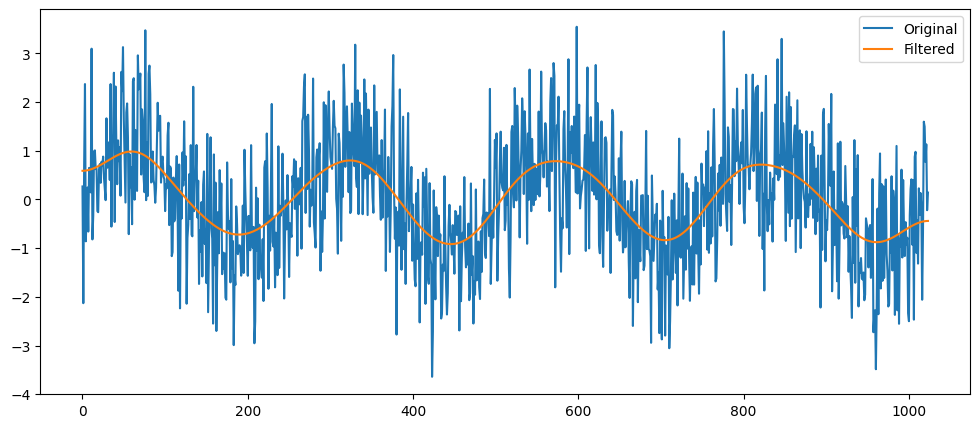

In [14]:
from scipy.ndimage.filters import gaussian_filter1d

# Define your noisy signal
# noisy_signal = np.random.normal(0, 1, 100)

# Design a Gaussian filter
sigma = 2  # Standard deviation, adjust as needed

# Apply the filter
filtered_signal = gaussian_filter1d(noisy_signal, sigma)
for _ in range(200):
    filtered_signal = gaussian_filter1d(filtered_signal, sigma)

# Plot the original and filtered signals
plt.figure(figsize=(12, 5))
plt.plot(noisy_signal, label='Original')
plt.plot(filtered_signal, label='Filtered')
plt.legend()
plt.show()

In [34]:
np.correlate([2,-1,3,7,1,2,-3],[1,-1,2,-2,4,1,-2,5], mode='full')

array([ 10,  -9,  19,  36, -14,  33,   0,   7,  13, -18,  16,  -7,   5,
        -3])

In [16]:
np.convolve([1,2,3,1],[1,2,1,-1])

array([ 1,  4,  8,  8,  3, -2, -1])

In [35]:
np.dot([0,0,0,2,-1,3,7,1,2,-3],[1,-1,2,-2,4,1,-2,5,0,0])

-14

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
arr = np.random.normal(size=1000)
arr

array([ 5.63949291e-01,  3.41560321e-01, -3.29329363e-01, -1.17899508e-01,
        2.95486065e-01, -2.01264683e+00, -6.60310041e-01, -1.02883168e+00,
        5.52467259e-02,  1.11107874e-01, -1.35495384e+00, -3.65686707e-01,
       -3.61022275e-01, -3.52602144e-01, -1.78737493e-01,  1.18428132e+00,
        5.00820406e-01, -1.78091794e-01, -1.24296708e+00,  5.15669764e-01,
        1.68406751e+00, -1.62375435e+00,  1.33488933e+00,  7.39089489e-01,
        1.48301476e-01, -8.63889231e-02, -1.12196857e+00, -8.11064130e-02,
        6.43988369e-01,  1.52233440e+00, -4.41138439e-01, -2.80430305e-01,
        1.00234032e-01,  1.03228915e+00,  1.96705789e+00,  1.15548234e+00,
        3.46689332e-01, -1.77333934e+00, -8.43069527e-01, -5.16619742e-01,
        2.12062388e+00, -1.23035965e+00,  1.79391565e+00,  9.16205238e-01,
        1.73224669e+00,  2.58300515e-01, -6.65152881e-01, -4.15725867e-01,
        3.95037682e-01,  1.00942622e+00,  4.80140226e-01, -1.30186643e+00,
        1.58096187e-01, -

In [43]:
l = np.random.uniform(1,10,100)
l

array([4.3157568 , 4.51125813, 1.83554235, 9.72550739, 3.23102663,
       5.7138446 , 3.43090728, 4.71731226, 8.08533785, 3.28196246,
       7.132673  , 4.41730509, 2.3420712 , 7.53919989, 6.46436006,
       5.45279133, 7.26168178, 1.241639  , 7.29715311, 4.30896788,
       7.93791602, 1.72273853, 4.95402889, 9.31308201, 6.9161398 ,
       7.17809247, 8.79877698, 9.16387193, 7.39193516, 6.48976415,
       1.78705177, 5.90097247, 8.1417709 , 5.07468087, 2.26759517,
       7.76010843, 1.19915143, 2.85421506, 3.2370106 , 2.14280408,
       2.70222311, 2.17857625, 5.15724082, 5.18805703, 3.68915295,
       2.92870404, 1.11631228, 7.41609699, 7.25095975, 4.40022957,
       9.8304858 , 8.71615613, 1.14328905, 9.04658564, 8.71521224,
       4.58206608, 5.68042527, 1.26916243, 4.1924674 , 4.4575426 ,
       1.88983312, 9.91513773, 8.69519609, 5.58408106, 9.8767076 ,
       3.24241375, 2.07938976, 6.75091712, 8.9291286 , 3.6683948 ,
       8.21592449, 6.17383026, 8.29376825, 7.34189738, 7.16297

In [20]:
l.mean()

4.5848440073616015

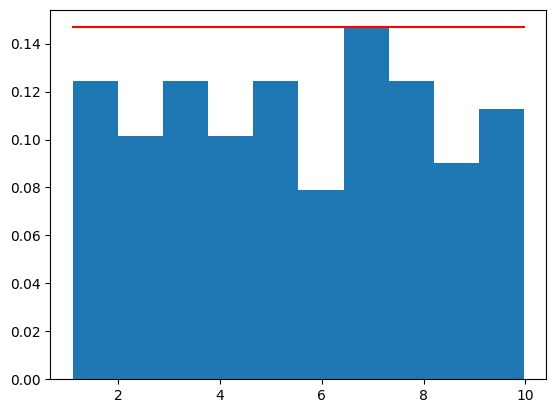

In [64]:
c, b, i = plt.hist(l, density=True)
plt.plot(b, np.full(b.shape, c.max()), color='r')
# plt.show()